Tugas Jobsheet 3 Machine learning
### Nama : Ana Bellatus Mustaqfiro
### NIM : 2241720095
### Kelas : TI-3F / 04

## Tugas 1 - Multiple Linier Regression

Import library

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

Baca Data

In [2]:
# baca data dari file CSV
data = pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encoding

In [3]:
label = LabelEncoder()

data['sex'] = label.fit_transform(data['sex'])
data['smoker'] = label.fit_transform(data['smoker'])
data['region'] = label.fit_transform(data['region'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Visualisasi Data

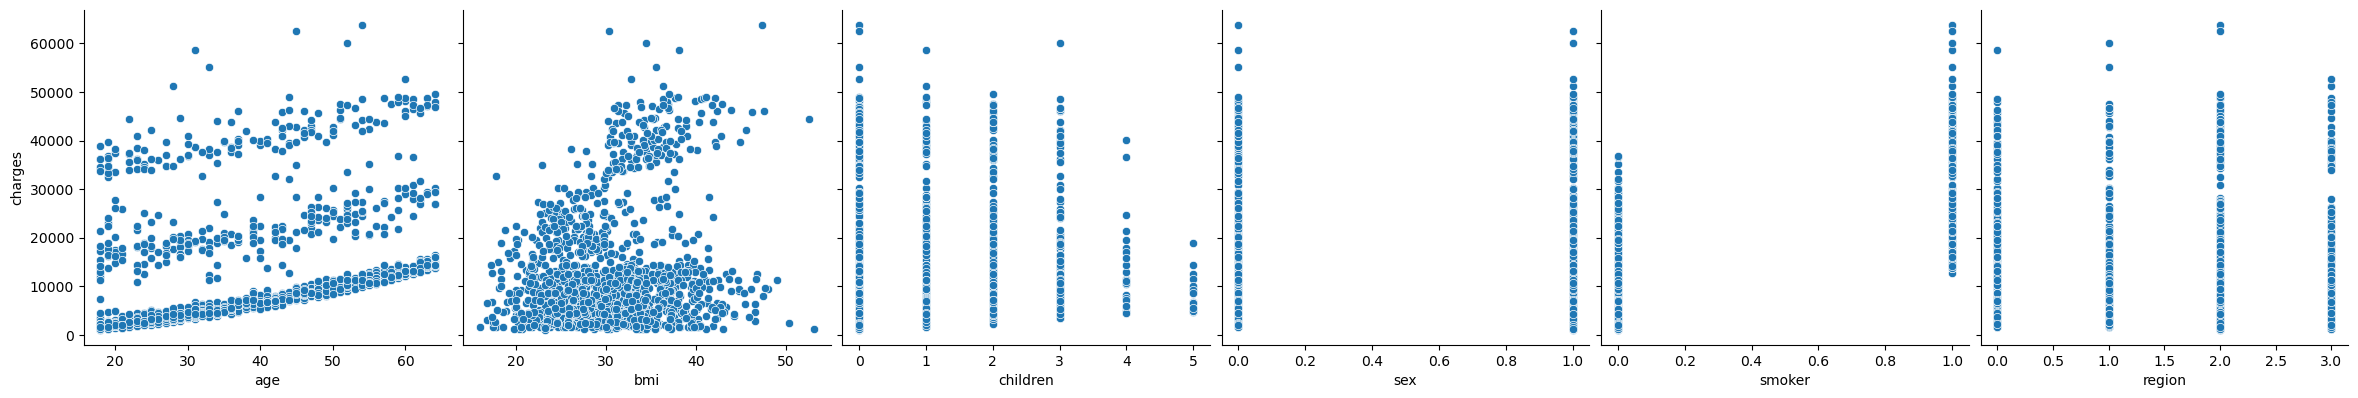

In [4]:
sns.pairplot(data, x_vars=['age', 'bmi', 'children', 'sex', 'smoker', 'region'], y_vars='charges', height=4, aspect=1, kind='scatter')

Visualisasi Korelasi

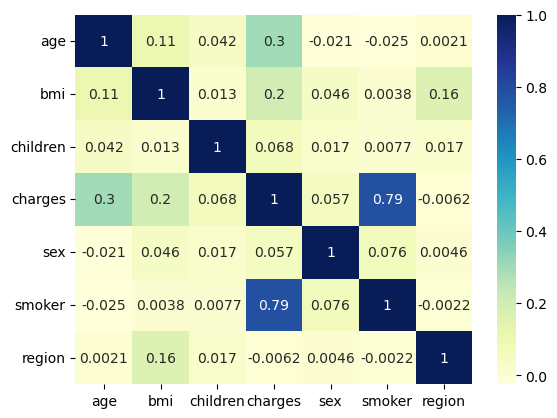

In [9]:
corr = data[['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']].corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [11]:
# variabel dengan korelasi paling tinggi yang digunakan sebagai variabel bebas adalah age, bmi, dan smoker
x = data[['age', 'bmi', 'smoker']]
y = data['charges']

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai

In [12]:
# membagi data latih dan data uji dengan proporsi 8:2, 80% data latih dan 20% data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

3. Lakukan feature scaling jika diperlukan

In [13]:
sc_age = StandardScaler()
sc_bmi = StandardScaler()
sc_smoker = StandardScaler()

x_train_scaled = x_train.copy()

x_train_scaled['age'] = sc_age.fit_transform(x_train[['age']])
x_train_scaled['bmi'] = sc_bmi.fit_transform(x_train[['bmi']])
x_train_scaled['smoker'] = sc_smoker.fit_transform(x_train[['smoker']])

x_test_scaled = x_test.copy()

x_test_scaled['age'] = sc_age.transform(x_test[['age']])
x_test_scaled['bmi'] = sc_bmi.transform(x_test[['bmi']])
x_test_scaled['smoker'] = sc_smoker.transform(x_test[['smoker']])

# menampilkan data asli dan data yang sudah discaling
print("Original X_train:")
print(x_train.head())

print("Scaled X_train:")
print(x_train_scaled.head())

Original X_train:
      age    bmi  smoker
560    46  19.95       0
1285   47  24.32       0
1142   52  24.86       0
969    39  34.32       0
486    54  21.47       0
Scaled X_train:
           age       bmi    smoker
560   0.472227 -1.756525 -0.508747
1285  0.543313 -1.033082 -0.508747
1142  0.898745 -0.943687 -0.508747
969  -0.025379  0.622393 -0.508747
486   1.040918 -1.504893 -0.508747


4. Buat model multiple linear regression menggunakan Scikit-Learn

In [14]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji

In [17]:
y_pred = linear_model.predict(x_test_scaled)

X_train_sm = sm.add_constant(x_train_scaled)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1007.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          1.65e-310
Time:                        04:56:18   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    187.904     71.026      0.000     1.3e+04    1.37e+04
age         3649.2224    189.488     19.258      0.000    3277.410    4021.034
bmi         1971.9425    189.232     10.421      0.000    1600.632    2343.253
smoker      9568.2791    188.159     50.852      0.000    9199.075    9937.484
==============================================================================
Omnibus:                      252.603   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.423
Skew:                           1.256   Prob(JB):                    1.70e-133
Kurtosis:                       5.720   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
lr.params

const     13346.089736
age        3649.222439
bmi        1971.942541
smoker     9568.279088
dtype: float64

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi

In [32]:
r2_value = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared : {r2_value}')
print(f'MSE : {mse}')
print(f'MAE : {mae}')

R-squared : 0.7776932310583375
MSE : 34512843.88022789
MAE : 4260.560091099391
